In [1]:
import sys
sys.path.append("../")

In [2]:
from torchvision import transforms

In [3]:
from src.dataset.custom_dataset import OdometerDataset, MJSynthDataset

/home/yannou/OneDrive/Documents/3_PRO/Box2Read/env-ocr/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data_dir = '/home/yannou/OneDrive/Documents/3_PRO/carviz/data/ocr/odometer_reader/milestone_box'
labels_file = '/home/yannou/OneDrive/Documents/3_PRO/carviz/data/ocr/odometer_reader/milestone_box/milestone_labels.json'


transform = transforms.Compose([
    transforms.RandomRotation(10),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2), 
    transforms.Grayscale(num_output_channels=1),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  
])



In [5]:
dataset = OdometerDataset(root_dir=data_dir, split="train", labels_file=labels_file, img_height=32, img_width=100, transform=transform)

In [6]:
dataset.display_images_with_info()

In [ ]:
dataset[0]

(tensor([[[-1.0000, -1.0000, -1.0000,  ...,  0.1137, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ...,  0.1216, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ...,  0.1216,  0.1216, -1.0000],
          ...,
          [-1.0000,  0.1373,  0.1137,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000,  0.1451,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000,  0.1608,  ..., -1.0000, -1.0000, -1.0000]]]),
 tensor([ 1,  8,  9,  7, 10, 10]),
 tensor([6]))

In [7]:
from torch.utils.data import DataLoader
from src.dataset.base_dataset import base_collate_fn

train_loader = DataLoader(dataset, batch_size=64, shuffle=True, collate_fn=base_collate_fn)

In [27]:
for i in train_loader:
    print(i[1].shape)
    break

torch.Size([330])


In [9]:
len(dataset)

3055

In [10]:
dataset[0][0].shape

torch.Size([1, 32, 100])

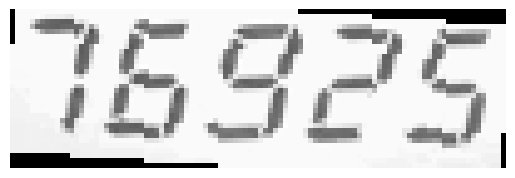

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToPILImage

# Récupérer l'image, le label et la longueur du label pour dataset[0]
image_tensor, target_tensor, target_length_tensor = dataset[6]

# Inverser la normalisation (pour revenir aux valeurs originales)
# Pour un seul canal (grayscale), la moyenne est 0.5 et l'écart-type est 0.5
image_tensor = (image_tensor * 0.5) + 0.5  # Inverser la normalisation (de [-1, 1] à [0, 1])

# Convertir le tensor en image PIL
to_pil = ToPILImage()
image_pil = to_pil(image_tensor.squeeze(0))  # Enlever la dimension supplémentaire (channel)

# Afficher l'image avec matplotlib
plt.imshow(image_pil, cmap='gray')  # 'gray' pour l'affichage en niveaux de gris
plt.axis('off')  # Ne pas afficher les axes
plt.show()


In [9]:
root_dir = '/home/yannou/OneDrive/Documents/3_PRO/carviz/data/ocr/MJSynth_text_recognition'

In [10]:
dataset = MJSynthDataset(root_dir, img_height=32, img_width=100, transform=transform)

In [11]:
len(dataset)

7224600

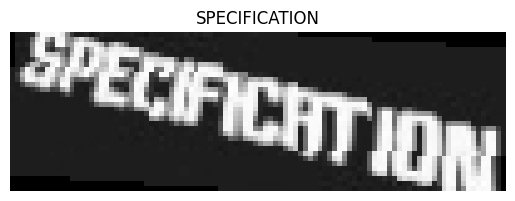

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import ToPILImage
import random 

# Retrieve the image, label, and label length for dataset[6]
image_tensor, target_tensor, target_length_tensor = dataset[random.randint(0, len(dataset)-1)]

# Invert normalization (to return to original values)
# For a single channel (grayscale), mean is 0.5 and std is 0.5
image_tensor = (image_tensor * 0.5) + 0.5  # Invert normalization (from [-1, 1] to [0, 1])

# Convert the tensor to a PIL image
to_pil = ToPILImage()
image_pil = to_pil(image_tensor.squeeze(0))  # Remove the extra dimension (channel)

# Convert the label tensor to a string using label2char
label = ''.join(dataset.label2char(idx.item()) for idx in target_tensor)

# Display the image with matplotlib
plt.imshow(image_pil, cmap='gray')  # 'gray' for grayscale display
plt.axis('off')  # Do not display axes
plt.title(label)
plt.show()
